# Setup

In [1]:
import data
import model
import utils
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm_notebook
import torchvision.models as models
from sklearn.metrics import accuracy_score

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Data Loading

In [3]:
dataset = data.dataset(image_root = './DRIMDB')
train_loader, val_loader = data.dataloader(dataset = dataset, batch_size = 16, validation_split = 0.2, shuffle_dataset = True)

# Sample visualization

In [4]:
train_iter = iter(train_loader)

In [ ]:
samples, labels = train_iter.next()

In [ ]:
# def imshow(img):
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()

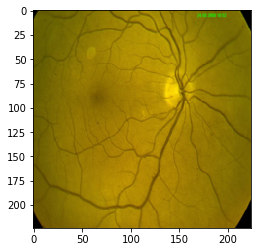

In [ ]:
trial_num = np.random.randint(0, 4)
utils.imshow(samples[trial_num])
# print(labels[trial_num])

In [ ]:
print(labels[trial_num])

Good


# Model

In [ ]:
# cnn = torchvision.models.alexnet(pretrained = True).to(device)
cnn = model.AlexNet(num_classes = 3).to(device)

In [ ]:
# for param in cnn.parameters():
#     param.requires_grad = False
# cnn.classifier[-1] = nn.Linear(in_features = 4096, out_features = 3, bias = True)


In [ ]:
cnn.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4

In [ ]:
for param in cnn.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([64, 3, 11, 11])
torch.Size([64])
torch.Size([192, 64, 5, 5])
torch.Size([192])
torch.Size([384, 192, 3, 3])
torch.Size([384])
torch.Size([256, 384, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([4096, 9216])
torch.Size([4096])
torch.Size([4096, 4096])
torch.Size([4096])
torch.Size([3, 4096])
torch.Size([3])


# Training

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optm = optim.SGD(cnn.parameters(), lr = 0.1)

In [ ]:
for epoch in tqdm_notebook(range(300)):
            
    loss_b = []
    acc_b = []
    for data in iter(train_loader):
        
        images, labels = data
        images = images.to(device)
        OH_labels = utils.encode_batch(labels, device)
        pred = cnn.forward(images)
        
        cnn.eval()
        acc = accuracy_score(torch.max(pred, 1)[1].cpu(), torch.max(OH_labels, 1)[1].cpu())
        acc_b.append(acc)
        
        cnn.train()
        loss = loss_fn(pred, torch.max(OH_labels, 1)[1])
        loss_b.append(loss.item())
        optm.zero_grad()
        loss.backward()
        optm.step()
        
        del images, labels, OH_labels, pred
        torch.cuda.empty_cache()
    print("Loss at epoch", epoch, "is %.4f"%loss.item())

Loss at epoch 0 is 1.0814
Loss at epoch 1 is 0.8936
Loss at epoch 2 is 0.9836
Loss at epoch 3 is 0.7904
Loss at epoch 4 is 0.8091
Loss at epoch 5 is 0.9850
Loss at epoch 6 is 0.7614
Loss at epoch 7 is 0.7780
Loss at epoch 8 is 0.6436
Loss at epoch 9 is 0.8245
Loss at epoch 10 is 1.0848
Loss at epoch 11 is 0.9070
Loss at epoch 12 is 0.9602
Loss at epoch 13 is 0.9283
Loss at epoch 14 is 0.7851
Loss at epoch 15 is 0.9986
Loss at epoch 16 is 0.8285
Loss at epoch 17 is 0.7765
Loss at epoch 18 is 0.9542
Loss at epoch 19 is 1.2893
Loss at epoch 20 is 0.7311
Loss at epoch 21 is 0.8609
Loss at epoch 22 is 0.6227
Loss at epoch 23 is 0.9955
Loss at epoch 24 is 0.9319
Loss at epoch 25 is 0.6453
Loss at epoch 26 is 0.8688
Loss at epoch 27 is 0.8658
Loss at epoch 28 is 1.2818
Loss at epoch 29 is 0.9080
Loss at epoch 30 is 1.0976
Loss at epoch 31 is 0.9202
Loss at epoch 32 is 0.6774
Loss at epoch 33 is 0.6964
Loss at epoch 34 is 1.1748
Loss at epoch 35 is 0.7237
Loss at epoch 36 is 0.8789
Loss at epo

In [ ]:
utils.visualize_results(loss_b, acc_b)

In [ ]:
acc_b

In [ ]:
loss_b

In [ ]:
total, correct = 0, 0
for data in val_loader:
    inputs, labels = data
    OH_labels = utils.encode_batch(labels, device)
    inputs = inputs.to(device)
    outputs = cnn.forward(inputs)
    pred = torch.max(outputs, 1)[1]
    total += len(labels)
    correct += (pred == torch.max(OH_labels, 1)[1]).sum().item()

print(100 * correct / total)

In [ ]:
trial_num = np.random.randint(0, 6)
print(cnn(samples[trial_num].unsqueeze(0).to(device)))

In [ ]:
labels[trial_num]

In [ ]:
correct

In [ ]:
total

In [ ]:
pred

In [ ]:
torch.max(OH_labels, 1)[1]

In [ ]:
outputs